# Salary Classification

In [1]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
gaji_train = pd.read_csv('data/train.csv')
gaji_test = pd.read_csv('data/test.csv')

In [3]:
gaji_train.head(10)

id  Umur Kelas Pekerja  Berat Akhir         Pendidikan  \
0   0    21    Wiraswasta       242912                SMA   
1   1    49    Wiraswasta       140782               10th   
2   2    44    Wiraswasta       120057                 D3   
3   3    24    Wiraswasta       194630            Sarjana   
4   4    33    Wiraswasta       219619             Master   
5   5    31    Wiraswasta       331065            Sarjana   
6   6    32    Wiraswasta       111520  Pendidikan Tinggi   
7   7    20    Wiraswasta       115057                SMA   
8   8    23             ?       191910  Pendidikan Tinggi   
9   9    43    Wiraswasta       134120                SMA   

   Jmlh Tahun Pendidikan     Status Perkawinan              Pekerjaan  \
0                      9  Belum Pernah Menikah         Servis Lainnya   
1                      6                 Cerai  Ekesekutif Managerial   
2                     12               Menikah  Ekesekutif Managerial   
3                     13  Belum Pernah Menikah              Spesialis   
4                     14               Menikah              Spesialis   
5                     13  Belum Pernah Menikah  Ekesekutif Managerial   
6                     10  Belum Pernah Menikah         Servis Lainnya   
7                      9  Belum Pernah Menikah    Perbaikan Kerajinan   
8                     10  Belum Pernah Menikah                      ?   
9                      9                 Cerai                  Sales   

  Jenis Kelamin  Keuntungan Kapital  Kerugian Capital  Jam per Minggu   Gaji  
0     Perempuan                 0.0               0.0            35.0  <=7jt  
1     Perempuan                 0.0               0.0            40.0  <=7jt  
2         Laki2          61404000.0               0.0            45.0   >7jt  
3         Laki2                 0.0               0.0            35.0  <=7jt  
4         Laki2         210336000.0               0.0            40.0   >7jt  
5     Perempuan                 0.0        19712000.0            40.0  <=7jt  
6         Laki2                 0.0               0.0            34.0  <=7jt  
7         Laki2                 0.0               0.0            40.0  <=7jt  
8         Laki2                 0.0               0.0            40.0  <=7jt  
9     Perempuan                 0.0               0.0            46.0  <=7jt

In [4]:
gaji_test.head(10)

id  Umur                  Kelas Pekerja  Berat Akhir         Pendidikan  \
0  35994    30               Pemerintah Lokal        99761                 D4   
1  35995    28                     Wiraswasta       202206                SMA   
2  35996    34            Pemerintah Provinsi       199934  Pendidikan Tinggi   
3  35997    51                     Wiraswasta       373448  Pendidikan Tinggi   
4  35998    20                              ?       144685  Pendidikan Tinggi   
5  35999    51                     Wiraswasta       137815  Pendidikan Tinggi   
6  36000    17                     Wiraswasta       165918               11th   
7  36001    63                     Wiraswasta       183608               10th   
8  36002    60  Pekerja Bebas Bukan Perusahan       153356                SMA   
9  36003    30  Pekerja Bebas Bukan Perusahan       176185                 D3   

   Jmlh Tahun Pendidikan     Status Perkawinan              Pekerjaan  \
0                     11                 Cerai           Pemuka Agama   
1                      9               Menikah         Mesin Inspeksi   
2                     10               Menikah           Pemuka Agama   
3                     10               Menikah  Ekesekutif Managerial   
4                     10  Belum Pernah Menikah                      ?   
5                     10               Menikah           Pemuka Agama   
6                      7  Belum Pernah Menikah              Pembersih   
7                      6               Menikah  Ekesekutif Managerial   
8                      9                 Cerai                  Sales   
9                     12               Menikah                  Sales   

  Jenis Kelamin  Keuntungan Kapital  Kerugian Capital  Jam per Minggu  
0     Perempuan                 0.0               0.0            40.0  
1         Laki2                 0.0               0.0            50.0  
2         Laki2                 0.0               0.0            40.0  
3         Laki2                 0.0        28028000.0            40.0  
4     Perempuan                 0.0        22428000.0            40.0  
5         Laki2         102172000.0               0.0            40.0  
6         Laki2                 0.0               0.0            20.0  
7         Laki2                 0.0               0.0            40.0  
8         Laki2          36358000.0               0.0            55.0  
9         Laki2                 0.0               0.0            60.0

In [5]:
gaji_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          35994 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              35994 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 3.6+ MB


In [6]:
gaji_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     9599 non-null   int64  
 1   Umur                   9599 non-null   int64  
 2   Kelas Pekerja          9599 non-null   object 
 3   Berat Akhir            9599 non-null   int64  
 4   Pendidikan             9599 non-null   object 
 5   Jmlh Tahun Pendidikan  9599 non-null   int64  
 6   Status Perkawinan      9599 non-null   object 
 7   Pekerjaan              9599 non-null   object 
 8   Jenis Kelamin          9599 non-null   object 
 9   Keuntungan Kapital     9599 non-null   float64
 10  Kerugian Capital       9599 non-null   float64
 11  Jam per Minggu         9599 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 900.0+ KB


In [7]:
data = [gaji_train, gaji_test]
for df in data:
    df.replace('?', np.nan, inplace=True)
    null_cols = df.columns[df.isnull().any()]
    print('Missing Data:')
    print(df[null_cols].isnull().sum())
    print('Deskripsi Data:')
    print(df[null_cols].describe())
    print('\n')

Missing Data:
Kelas Pekerja    2063
Pekerjaan        2069
dtype: int64
Deskripsi Data:
       Kelas Pekerja  Pekerjaan
count          33931      33925
unique             8         14
top       Wiraswasta  Spesialis
freq           24948       4587


Missing Data:
Kelas Pekerja    552
Pekerjaan        554
dtype: int64
Deskripsi Data:
       Kelas Pekerja            Pekerjaan
count           9047                 9045
unique             8                   14
top       Wiraswasta  Perbaikan Kerajinan
freq            6714                 1205




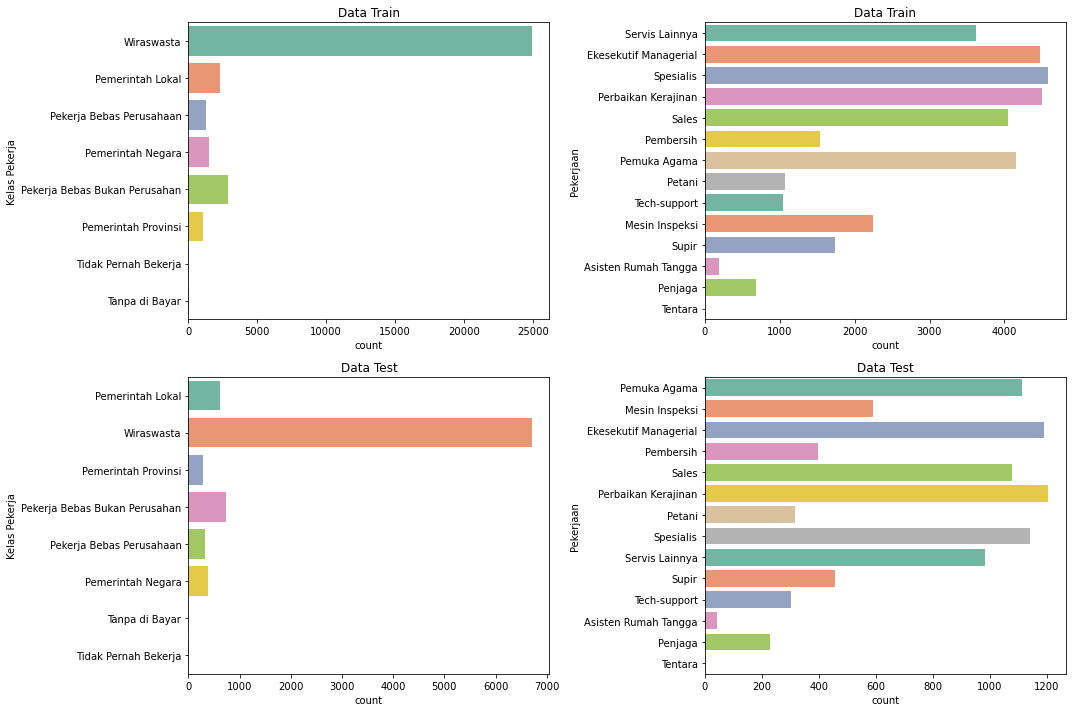

In [8]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,10)
sns.countplot(data=gaji_train, y='Kelas Pekerja', palette='Set2', ax=ax[0,0])
sns.countplot(data=gaji_train, y='Pekerjaan', palette='Set2', ax=ax[0,1])
ax[0,0].set_title('Data Train')
ax[0,1].set_title('Data Train')
sns.countplot(data=gaji_test, y='Kelas Pekerja', palette='Set2', ax=ax[1,0])
sns.countplot(data=gaji_test, y='Pekerjaan', palette='Set2', ax=ax[1,1])
ax[1,0].set_title('Data Test')
ax[1,1].set_title('Data Test')
plt.tight_layout()
plt.show()

In [9]:
for df in data:
    df['Kelas Pekerja'] = df['Kelas Pekerja'].fillna('Wiraswasta')
    df['Pekerjaan'] = df['Pekerjaan'].fillna(method='ffill')
    print(df.isnull().sum().any())

False
False


## EDA

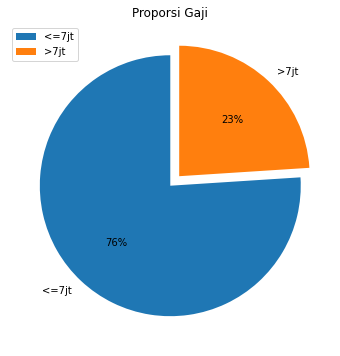

In [10]:
df_gaji = gaji_train['Gaji'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(df_gaji, labels=df_gaji.index, autopct='%d%%', 
        explode=(0, 0.1), startangle=90)
plt.title('Proporsi Gaji')
plt.legend()
plt.show()

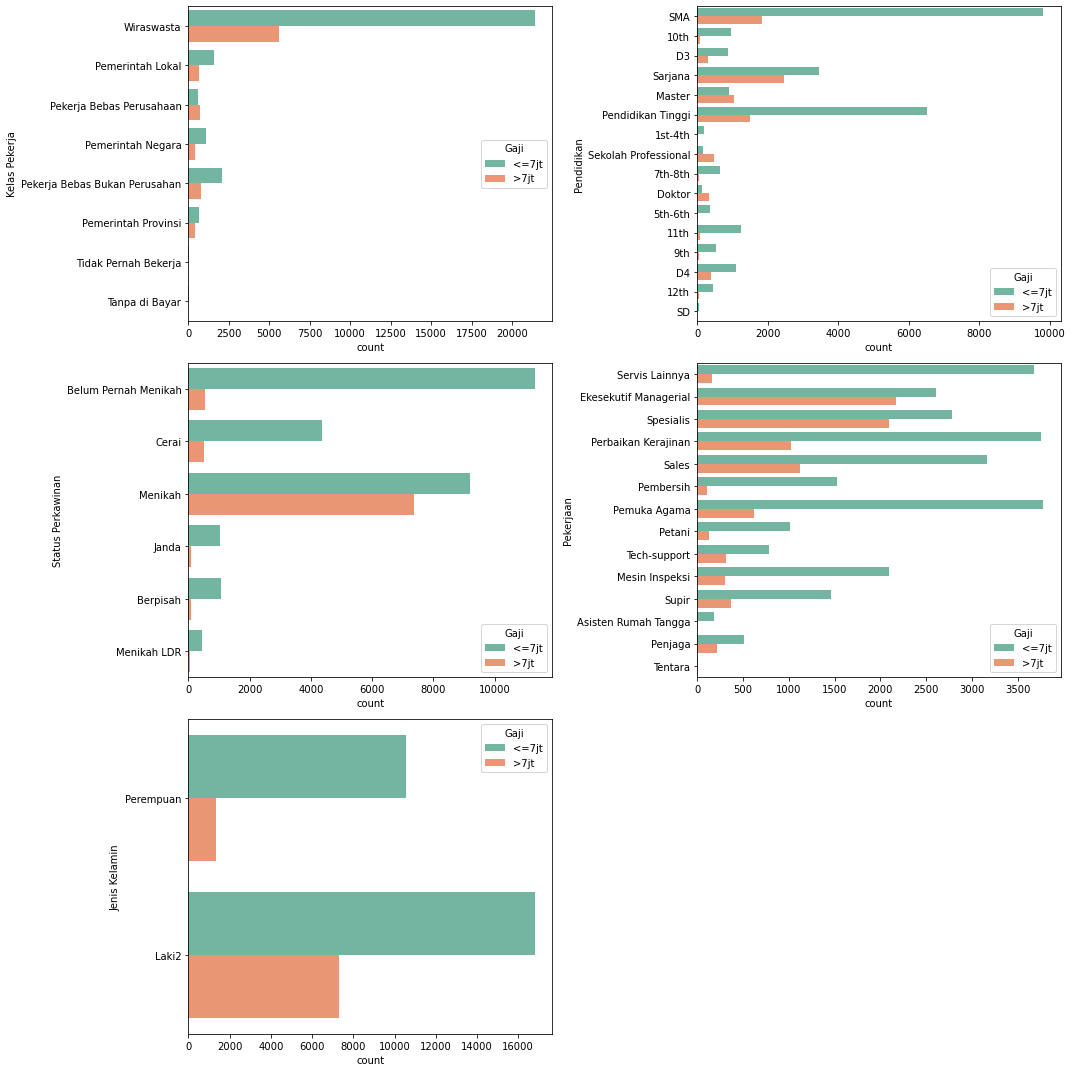

In [11]:
data_categorical = gaji_train.select_dtypes(include='O')
plt.figure(figsize=(15,15))
for i in range(0, len(data_categorical.columns)-1):
    plt.subplot(3, 2, i+1)
    sns.countplot(y = data_categorical.iloc[:,i], hue=data_categorical['Gaji'], palette='Set2')
    plt.tight_layout()

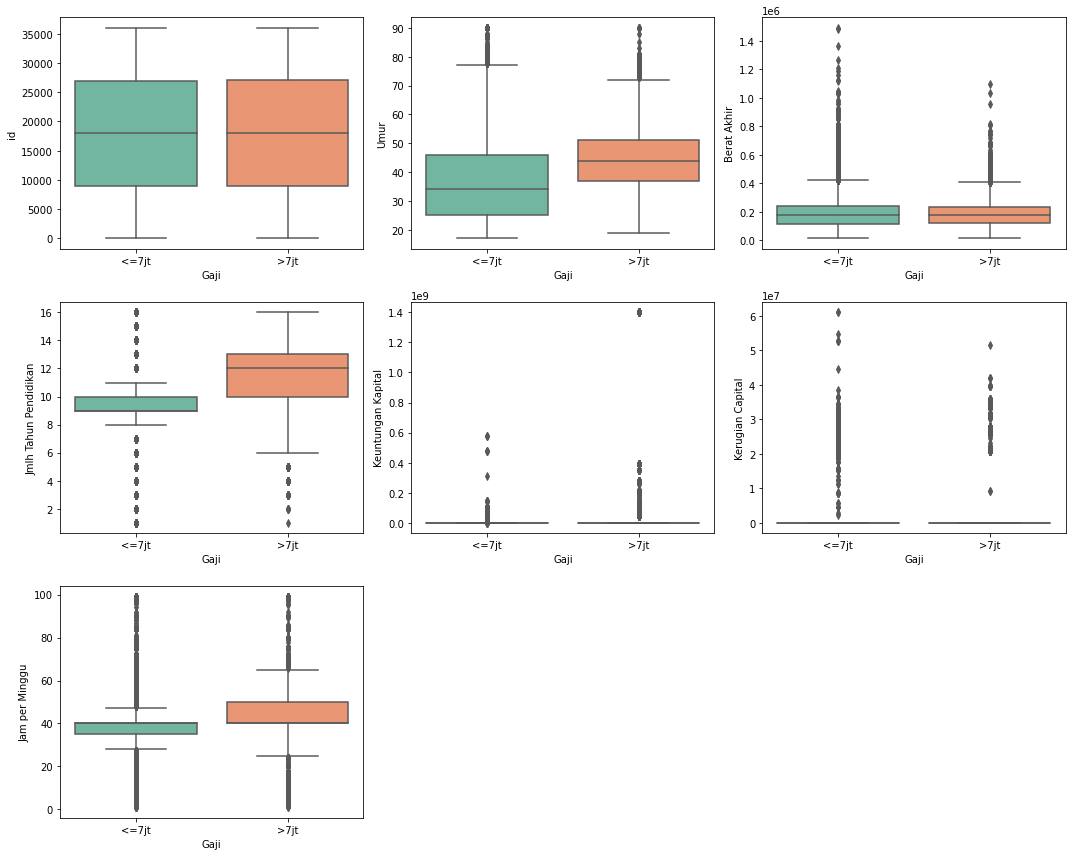

In [12]:
data_numerical = gaji_train.select_dtypes(exclude='O')
data_numerical['Gaji'] = gaji_train['Gaji'].copy()
plt.figure(figsize=(15,12))
for i in range(0, len(data_numerical.columns)-1):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = data_numerical['Gaji'], y = data_numerical.iloc[:,i], palette='Set2')
    plt.tight_layout()

## Feature Engineering

In [13]:
gaji_train.head()

id  Umur Kelas Pekerja  Berat Akhir Pendidikan  Jmlh Tahun Pendidikan  \
0   0    21    Wiraswasta       242912        SMA                      9   
1   1    49    Wiraswasta       140782       10th                      6   
2   2    44    Wiraswasta       120057         D3                     12   
3   3    24    Wiraswasta       194630    Sarjana                     13   
4   4    33    Wiraswasta       219619     Master                     14   

      Status Perkawinan              Pekerjaan Jenis Kelamin  \
0  Belum Pernah Menikah         Servis Lainnya     Perempuan   
1                 Cerai  Ekesekutif Managerial     Perempuan   
2               Menikah  Ekesekutif Managerial         Laki2   
3  Belum Pernah Menikah              Spesialis         Laki2   
4               Menikah              Spesialis         Laki2   

   Keuntungan Kapital  Kerugian Capital  Jam per Minggu   Gaji  
0                 0.0               0.0            35.0  <=7jt  
1                 0.0               0.0            40.0  <=7jt  
2          61404000.0               0.0            45.0   >7jt  
3                 0.0               0.0            35.0  <=7jt  
4         210336000.0               0.0            40.0   >7jt

In [14]:
for df in data:
    df['Keuntungan Kapital'] = df['Keuntungan Kapital'].astype('int')
    df['Kerugian Capital'] = df['Kerugian Capital'].astype('int')
    df['Jam per Minggu'] = df['Jam per Minggu'].astype('int')
    df.loc[(df['Keuntungan Kapital'] == 0) & (df['Kerugian Capital'] == 0), 'Kapital'] = 'Normal'
    df.loc[df['Keuntungan Kapital'] != 0, 'Kapital'] = 'Untung'
    df.loc[df['Kerugian Capital'] != 0, 'Kapital'] = 'Rugi'

In [15]:
for col in gaji_train.columns.values:
    if gaji_train[col].dtype != 'object':
        print(f'Data {col}:')
        print(gaji_train[col].describe())
        print('\n')

Data id:
count    35994.000000
mean     17996.500000
std      10390.717131
min          0.000000
25%       8998.250000
50%      17996.500000
75%      26994.750000
max      35993.000000
Name: id, dtype: float64


Data Umur:
count    35994.000000
mean        38.664555
std         13.676266
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Umur, dtype: float64


Data Berat Akhir:
count    3.599400e+04
mean     1.899318e+05
std      1.058023e+05
min      1.228500e+04
25%      1.177670e+05
50%      1.784665e+05
75%      2.379185e+05
max      1.490400e+06
Name: Berat Akhir, dtype: float64


Data Jmlh Tahun Pendidikan:
count    35994.000000
mean        10.079874
std          2.574813
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Jmlh Tahun Pendidikan, dtype: float64


Data Keuntungan Kapital:
count    3.599400e+04
mean     1.503923e+07
std      1.029919e+08
m

In [16]:
scale_cols = ['Umur','Berat Akhir','Keuntungan Kapital','Kerugian Capital','Jam per Minggu']
for df in data:
    #df.drop(['Keuntungan Kapital','Kerugian Capital'], axis=1, inplace=True)
    scaler = StandardScaler()
    df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [17]:
for col in gaji_train.columns.values:
    if gaji_train[col].dtype == 'object':
        print(f'Data {col}:')
        print(gaji_train[col].value_counts(normalize=True))
        print('\n')

Data Kelas Pekerja:
Wiraswasta                       0.750431
Pekerja Bebas Bukan Perusahan    0.079624
Pemerintah Lokal                 0.063344
Pemerintah Negara                0.041035
Pekerja Bebas Perusahaan         0.035367
Pemerintah Provinsi              0.029616
Tanpa di Bayar                   0.000417
Tidak Pernah Bekerja             0.000167
Name: Kelas Pekerja, dtype: float64


Data Pendidikan:
SMA                     0.324110
Pendidikan Tinggi       0.222398
Sarjana                 0.164694
Master                  0.054009
D4                      0.041674
11th                    0.036534
D3                      0.032644
10th                    0.028449
7th-8th                 0.018948
Sekolah Professional    0.017281
9th                     0.015836
12th                    0.013280
Doktor                  0.012530
5th-6th                 0.010780
1st-4th                 0.005112
SD                      0.001723
Name: Pendidikan, dtype: float64


Data Status Perkawinan:
Me

In [18]:
pendidikan = gaji_train['Pendidikan'].unique()
tahun = gaji_train['Jmlh Tahun Pendidikan'].unique()
for p, t in zip(pendidikan, tahun):
    print('Pendidikan : {}, Jumlah Tahun : {}'.format(p, t))

Pendidikan : SMA, Jumlah Tahun : 9
Pendidikan : 10th, Jumlah Tahun : 6
Pendidikan : D3, Jumlah Tahun : 12
Pendidikan : Sarjana, Jumlah Tahun : 13
Pendidikan : Master, Jumlah Tahun : 14
Pendidikan : Pendidikan Tinggi, Jumlah Tahun : 10
Pendidikan : 1st-4th, Jumlah Tahun : 2
Pendidikan : Sekolah Professional, Jumlah Tahun : 15
Pendidikan : 7th-8th, Jumlah Tahun : 4
Pendidikan : Doktor, Jumlah Tahun : 16
Pendidikan : 5th-6th, Jumlah Tahun : 3
Pendidikan : 11th, Jumlah Tahun : 7
Pendidikan : 9th, Jumlah Tahun : 5
Pendidikan : D4, Jumlah Tahun : 11
Pendidikan : 12th, Jumlah Tahun : 8
Pendidikan : SD, Jumlah Tahun : 1


In [19]:
# Encoding data target
gaji_train['Gaji'] = gaji_train['Gaji'].replace({'<=7jt':0, '>7jt':1})
# Encoding data categorical
for df in data:
    df['Kelas Pekerja'] = df['Kelas Pekerja'].map({'Tidak Pernah Bekerja':0,'Tanpa di Bayar':1, 
                                                   'Pekerja Bebas Perusahaan':2,'Pemerintah Lokal':3, 
                                                   'Pemerintah Provinsi':4, 'Pemerintah Negara':5,
                                                   'Pekerja Bebas Bukan Perusahan':6, 'Wiraswasta':7})
    df['Pendidikan'] = df['Pendidikan'].map({'SD':1,'1st-4th':2,'5th-6th':3,'7th-8th':4,
                                             '9th':5, '10th':6, '11th':7, '12th':8, 'SMA':9,
                                             'Pendidikan Tinggi':10, 'D4':11, 'D3':12, 'Sarjana':13,
                                             'Master':14, 'Sekolah Professional':15, 'Doktor':16})
    #df.drop('Jmlh Tahun Pendidikan', axis=1, inplace=True)
    df['Status Perkawinan'] = df['Status Perkawinan'].map({'Belum Pernah Menikah':0,'Cerai':1,
                                                           'Janda':1,'Berpisah':1,'Menikah':2, 
                                                           'Menikah LDR':2})
    df['Pekerjaan'] = df['Pekerjaan'].map({'Tentara':1,'Asisten Rumah Tangga':2,'Penjaga':2,'Pembersih':2,
                                           'Tech-support':3,'Petani':4,'Supir':5,'Mesin Inspeksi':6,
                                           'Servis Lainnya':7,'Sales':8,'Pemuka Agama':9,'Ekesekutif Managerial':10, 
                                           'Perbaikan Kerajinan':11, 'Spesialis':12})
    df['Jenis Kelamin'] = df['Jenis Kelamin'].replace({'Perempuan':0, 'Laki2':1})
    df['Kapital'] = df['Kapital'].map({'Rugi':-1, 'Normal':0, 'Untung':1})

In [20]:
gaji_train.head()

id      Umur  Kelas Pekerja  Berat Akhir  Pendidikan  \
0   0 -1.291639              7     0.500754           9   
1   1  0.755732              7    -0.464550           6   
2   2  0.390130              7    -0.660437          12   
3   3 -1.072278              7     0.044406          13   
4   4 -0.414194              7     0.280595          14   

   Jmlh Tahun Pendidikan  Status Perkawinan  Pekerjaan  Jenis Kelamin  \
0                      9                  0          7              0   
1                      6                  1         10              0   
2                     12                  2         10              1   
3                     13                  0         12              1   
4                     14                  2         12              1   

   Keuntungan Kapital  Kerugian Capital  Jam per Minggu  Gaji  Kapital  
0           -0.146026          -0.21628       -0.439516     0        0  
1           -0.146026          -0.21628       -0.035226     0        0  
2            0.450185          -0.21628        0.369063     1        1  
3           -0.146026          -0.21628       -0.439516     0        0  
4            1.896261          -0.21628       -0.035226     1        1

In [21]:
X = gaji_train.drop(['id','Gaji'], axis=1)
y = gaji_train['Gaji']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = []
accuracy = []
validation = []
target = ['<= 7jt', '> 7jt']

Accuracy Model Logistic Regression : 84.39%
Validation Model Logistic Regression : 84.39%


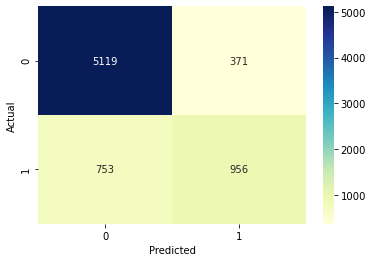

              precision    recall  f1-score   support

      <= 7jt       0.87      0.93      0.90      5490
       > 7jt       0.72      0.56      0.63      1709

    accuracy                           0.84      7199
   macro avg       0.80      0.75      0.77      7199
weighted avg       0.84      0.84      0.84      7199



In [23]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
acc1 = model1.score(X_test, y_test)
val1 = np.mean(cross_val_score(model1, X_train, y_train, cv=5))
model.append('Logistic Regression')
accuracy.append(round(acc1*100, 2))
validation.append(round(val1*100, 2))

print('Accuracy Model Logistic Regression : {:.2f}%'.format(acc1*100))
print('Validation Model Logistic Regression : {:.2f}%'.format(val1*100))
matrix1 = confusion_matrix(y_test, pred1)
sns.heatmap(matrix1, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
report1 = classification_report(y_test, pred1, target_names=target)
print(report1)

Accuracy Model Decision Tree Classifier : 81.57%
Validation Model Decision Tree Classifier : 80.77%


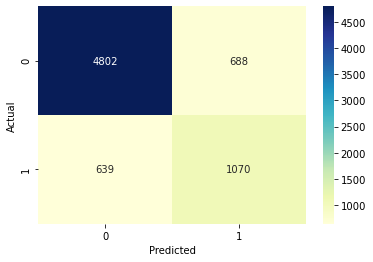

              precision    recall  f1-score   support

      <= 7jt       0.88      0.87      0.88      5490
       > 7jt       0.61      0.63      0.62      1709

    accuracy                           0.82      7199
   macro avg       0.75      0.75      0.75      7199
weighted avg       0.82      0.82      0.82      7199



In [24]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
acc2 = model2.score(X_test, y_test)
val2 = np.mean(cross_val_score(model2, X_train, y_train, cv=5))
model.append('Decision Tree Classifier')
accuracy.append(round(acc2*100, 2))
validation.append(round(val2*100, 2))

print('Accuracy Model Decision Tree Classifier : {:.2f}%'.format(acc2*100))
print('Validation Model Decision Tree Classifier : {:.2f}%'.format(val2*100))
matrix2 = confusion_matrix(y_test, pred2)
sns.heatmap(matrix2, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
report2 = classification_report(y_test, pred2, target_names=target)
print(report2)

Accuracy Model Random Forest Classifier : 85.44%
Validation Model Random Forest Classifier : 85.37%


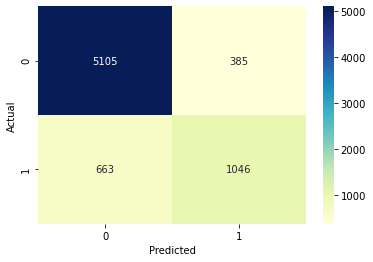

              precision    recall  f1-score   support

      <= 7jt       0.89      0.93      0.91      5490
       > 7jt       0.73      0.61      0.67      1709

    accuracy                           0.85      7199
   macro avg       0.81      0.77      0.79      7199
weighted avg       0.85      0.85      0.85      7199



In [25]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
acc3 = model3.score(X_test, y_test)
val3 = np.mean(cross_val_score(model3, X_train, y_train, cv=5))
model.append('Random Forest Classifier')
accuracy.append(round(acc3*100, 2))
validation.append(round(val3*100, 2))

print('Accuracy Model Random Forest Classifier : {:.2f}%'.format(acc3*100))
print('Validation Model Random Forest Classifier : {:.2f}%'.format(val3*100))
matrix3 = confusion_matrix(y_test, pred3)
sns.heatmap(matrix3, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
report3 = classification_report(y_test, pred3, target_names=target)
print(report3)

Accuracy Model Gradient Boosting Classifier : 86.39%
Validation Model Gradient Boosting Classifier : 86.51%


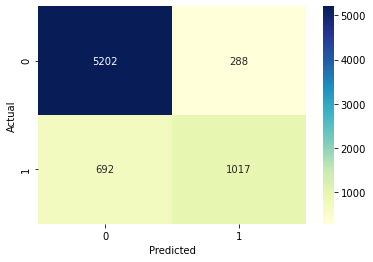

              precision    recall  f1-score   support

      <= 7jt       0.88      0.95      0.91      5490
       > 7jt       0.78      0.60      0.67      1709

    accuracy                           0.86      7199
   macro avg       0.83      0.77      0.79      7199
weighted avg       0.86      0.86      0.86      7199



In [26]:
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
acc4 = model4.score(X_test, y_test)
val4 = np.mean(cross_val_score(model4, X_train, y_train, cv=5))
model.append('Gradient Boosting Classifier')
accuracy.append(round(acc4*100, 2))
validation.append(round(val4*100, 2))

print('Accuracy Model Gradient Boosting Classifier : {:.2f}%'.format(acc4*100))
print('Validation Model Gradient Boosting Classifier : {:.2f}%'.format(val4*100))
matrix4 = confusion_matrix(y_test, pred4)
sns.heatmap(matrix4, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
report4 = classification_report(y_test, pred4, target_names=target)
print(report4)

[20:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

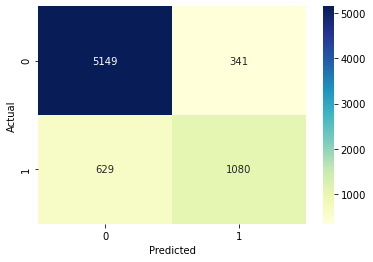

              precision    recall  f1-score   support

      <= 7jt       0.89      0.94      0.91      5490
       > 7jt       0.76      0.63      0.69      1709

    accuracy                           0.87      7199
   macro avg       0.83      0.78      0.80      7199
weighted avg       0.86      0.87      0.86      7199



In [27]:
model5 = XGBClassifier()
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)
acc5 = model5.score(X_test, y_test)
val5 = np.mean(cross_val_score(model5, X_train, y_train, cv=5))
model.append('XGBoost Classifier')
accuracy.append(round(acc5*100, 2))
validation.append(round(val5*100, 2))

print('Accuracy Model XGBoost Classifier : {:.2f}%'.format(acc5*100))
print('Validation Model XGBoost Classifier : {:.2f}%'.format(val5*100))
matrix5 = confusion_matrix(y_test, pred5)
sns.heatmap(matrix5, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
report5 = classification_report(y_test, pred5, target_names=target)
print(report5)

In [28]:
result = pd.DataFrame({'Model':model, 'Score Accuracy':accuracy, 'Score Validation':validation})
result['Diff Score'] = np.abs(result['Score Accuracy'] - result['Score Validation'])
print(result)

                          Model  Score Accuracy  Score Validation  Diff Score
0           Logistic Regression           84.39             84.39        0.00
1      Decision Tree Classifier           81.57             80.77        0.80
2      Random Forest Classifier           85.44             85.37        0.07
3  Gradient Boosting Classifier           86.39             86.51        0.12
4            XGBoost Classifier           86.53             86.69        0.16


<AxesSubplot:xlabel='Score Accuracy', ylabel='Model'>

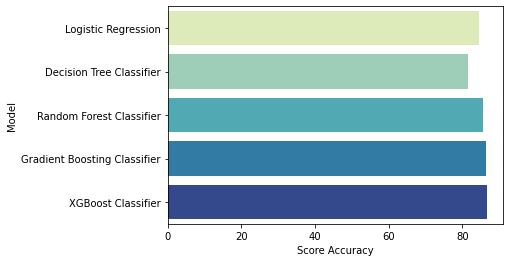

In [29]:
sns.barplot(data=result, y='Model', x='Score Accuracy', palette='YlGnBu')

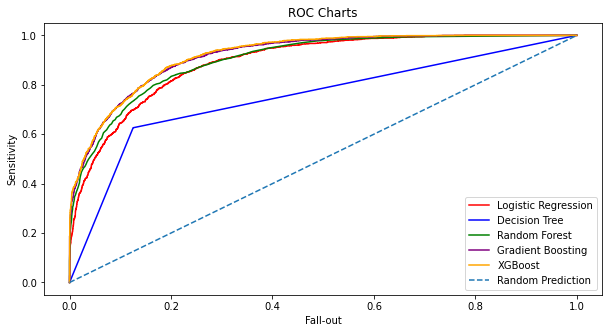

In [30]:
# ROC chart components
fallout1, sensitivity1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
fallout2, sensitivity2, thresholds2 = roc_curve(y_test, model2.predict_proba(X_test)[:,1])
fallout3, sensitivity3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test)[:,1])
fallout4, sensitivity4, thresholds4 = roc_curve(y_test, model4.predict_proba(X_test)[:,1])
fallout5, sensitivity5, thresholds5 = roc_curve(y_test, model5.predict_proba(X_test)[:,1])
# ROC Chart with both
plt.figure(figsize=(10,5))
plt.plot(fallout1, sensitivity1, c='red', label='%s' %'Logistic Regression')
plt.plot(fallout2, sensitivity2, c='blue', label='%s' %'Decision Tree')
plt.plot(fallout3, sensitivity3, c='green', label='%s' %'Random Forest')
plt.plot(fallout4, sensitivity4, c='purple', label='%s' %'Gradient Boosting')
plt.plot(fallout5, sensitivity5, c='orange', label='%s' %'XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' %'Random Prediction')
plt.title("ROC Charts")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [31]:
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, model1.predict_proba(X_test)[:,1]))
print("Decision Tree Classifier AUC Score: %0.2f" % roc_auc_score(y_test, model2.predict_proba(X_test)[:,1]))
print("Random Forest Classifier AUC Score: %0.2f" % roc_auc_score(y_test, model3.predict_proba(X_test)[:,1]))
print("Gradient Boosting Classifier AUC Score: %0.2f" % roc_auc_score(y_test, model4.predict_proba(X_test)[:,1]))
print("XGBoost Classifier AUC Score: %0.2f" % roc_auc_score(y_test, model5.predict_proba(X_test)[:,1]))

Logistic Regression AUC Score: 0.89
Decision Tree Classifier AUC Score: 0.75
Random Forest Classifier AUC Score: 0.90
Gradient Boosting Classifier AUC Score: 0.92
XGBoost Classifier AUC Score: 0.92


In [32]:
gaji_test.head()

id      Umur  Kelas Pekerja  Berat Akhir  Pendidikan  \
0  35994 -0.612932              3    -0.847976          11   
1  35995 -0.758052              7     0.114735           9   
2  35996 -0.322692              4     0.093384          10   
3  35997  0.910830              7     1.723954          10   
4  35998 -1.338533              7    -0.425810          10   

   Jmlh Tahun Pendidikan  Status Perkawinan  Pekerjaan  Jenis Kelamin  \
0                     11                  1          9              0   
1                      9                  2          6              1   
2                     10                  2          9              1   
3                     10                  2         10              1   
4                     10                  0         10              0   

   Keuntungan Kapital  Kerugian Capital  Jam per Minggu  Kapital  
0           -0.143024         -0.219254       -0.026687        0  
1           -0.143024         -0.219254        0.779877        0  
2           -0.143024         -0.219254       -0.026687        0  
3           -0.143024          4.686112       -0.026687       -1  
4           -0.143024          3.706019       -0.026687       -1

In [33]:
best_model = model5
X_gaji = gaji_test.drop('id', axis=1)
pred_gaji = best_model.predict(X_gaji)
submission = pd.DataFrame({'id':gaji_test['id'].values, 'Gaji':pred_gaji})
submission.head()

id  Gaji
0  35994     0
1  35995     0
2  35996     1
3  35997     1
4  35998     0

In [34]:
submission.to_csv('data/Submission.csv', index=False)